("________________________________________Today's date and time D,M,Y,H,M,S:", '03_11_2022_14_59_53')
 Ispitivanje ponovljivosti: iteracija br. 0
('Time Elapsed Load Dataset', '0.027595043182373047')
('Size of Train dataset : ', '6082')
('Size of Validation dataset : ', '474')
('Size of Test dataset : ', '533')
('Epochs : ', 1)
('Batch Size : ', 64)
('Load Numpy : ', True)
('Net Type : ', 'UNet16_2')
('Use Loss weights : ', False)
('Scheduler : ', 'multiplicative')
('Loss Type : ', 'ce')
('Learning Rate : ', 0.001)
('Use weight decay : ', 0)
('Device : ', 'cpu')
('Num Channels : ', 4)
('Num Channels Labele : ', 10)
Epoch 0: Train[

C:\Users\daniv\Downloads\Agrovision_Net_Jup\loss_utils.py:152: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorAdvancedIndexing.cpp:1391.)
  classwise_loss[img_count_index + batch_im_id][z_class[batch_im_id].byte()] = loss_imwise.mean()


************************************************************************************************]  Validation[********]  Testing[*********] Epoch: 0 ; Train Loss = tensor(1.8072) Validation Loss = tensor(1.7878) Test Loss = tensor(1.7538) Learning rate = 0.001
Model BEST saved at path>> C:/Users/daniv/Downloads/Agrovision_Net_Jup/logs/Jupyter/0_03_11_2022_14_59_53_UNet16_2_lr_0.001_step_na_5_epoha_lambda_0.95_batch_size_64_sched_multiplicative_loss_ce/NN_model_ep_1_Jupyter/trained_model_best_epoch0.pt
Model saved at path>> C:/Users/daniv/Downloads/Agrovision_Net_Jup/logs/Jupyter/0_03_11_2022_14_59_53_UNet16_2_lr_0.001_step_na_5_epoha_lambda_0.95_batch_size_64_sched_multiplicative_loss_ce/NN_model_ep_1_Jupyter/trained_model_epoch0.pt
Fully Trained Model saved at path>> C:/Users/daniv/Downloads/Agrovision_Net_Jup/logs/Jupyter/0_03_11_2022_14_59_53_UNet16_2_lr_0.001_step_na_5_epoha_lambda_0.95_batch_size_64_sched_multiplicative_loss_ce/NN_model_ep_1_Jupyter/fully_trained_model_epochs_0.pt

C:\Users\daniv\Downloads\Agrovision_Net_Jup\model_utils.py:367: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  iou_res = torch.tensor(iou_res, dtype=torch.float32, device=device)


("________________________________________Today's date and time D,M,Y,H,M,S:", '03_11_2022_16_24_55')
_______________________________________________________________________________KRAJ IZVRSAVANJA


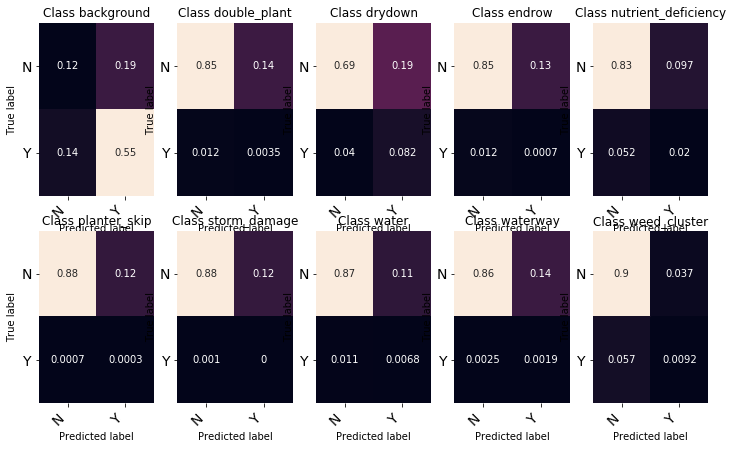

In [1]:
from print_utils import *
from data_utils import *
from loss_utils import *
from model_utils import *
from tb_utils import *
from metrics_utils import *
from config import *
from measure import *
from Train_Main_New import *
    
    #######################
    ### Hyperparameters ###
    #######################

# bool  
server = True  # Flag that indicates whether to use server or local machine

gpu = False # Flag that indicates whether to use gpu for training - it is connected with server and jupyter flags, if server is used it
            # will always be cuda regardless of gpu flag, this flag is considered only in relation to jupyter
jupyter = True # Flag that indicates wehether jupyter notebook is used to run the code 

load_numpy = True  # Flag that indicates what type of data we use as input

use_mask = True  # Flag that indicates are we masking data with boundery and valid masks

use_weights = False  # Flag that indicates whether to use class weights when initializing loss function

do_testing = True  # Flag that indicates whether to do testing after the training is done

count_logs_flag = False  # Flag that indicates whether to plot number of classes and pixels in tensorboard, classwise and batch-wise

zscore = 0  # 0-Instance, 1 - Zscore 2- /255 # Flag that indicates whether we use zscore normalization in preprocessing

binary = False  # Flag that indicates whether we do binary semantic segmentation

freeze_backbone_weights = False  # Flag that indicates whether to freeze backbone weights

early_stop = False  # Initial early stopping flag

save_best_model = True  # Initial "best model" flag, indicates whether to save model in corresponding epoch

# strings
net_type = "UNet16_2"  # UNet16,UNet32,UNet0  # Indicates Architecture that we want to use: UNet3, Unet_orig,...

img_data_format = '.npy'  # Indicated the type of data we use as input

scheduler_lr = 'multiplicative'  # Indicates which scheduler to use

dataset = "mini"  # "mini" or "full" Indicates whether we want to use full dataset for training, validation and testing or decimated version
year = "2021"  # "2020" or "2021"

# Integers
epochs = 1  # Number of epochs  we want our model training

set_random_seed = 15  # Setting random seed for torch random generator

batch_size = 64  # Size of batch during the training,validation and testing

shuffle_state = 1  # Random shuffle seeed

GPU_list = [0]  # Indices of GPUs that we want to allocate and use during the training

weight_decay = 0  # L2 penalty

optimizer_patience = 5  # When using ReduceLR scheduler: Indicates number of epochs without loss minimum decrease,
# after which the learning rate will be multiplied by a lambda parameter

save_checkpoint_freq = 1  # Initial frequency parameter for model saving

num_channels = 4  # Number of input channels: Red, Green, Blue, NIR

### early stopping ###

es_min = 1e9  # Initial minimum parameter for early stopping

es_epoch_count = 0  # Epoch counter for early stopping

es_check = 5  # Number of epochs after wich we dont have new minimal validation loss and after wich we apply early stopping


lr = [1e-3] # Initial Learning Rate
lambda_parametar = [0.95] # for Multiplicative scheduler parameter which describes the multiplied value for LR decrease 
stepovi_arr = [5] # for Multiplicative scheduler parameter which describes after how many epochs the lambda will be used
param_ponovljivosti = 1 # parameter which describes how many replications of the same experiment setup we desire 


#######################################################################
#######################################################################
##### Writing parameters into json config file
run_config_jupyter(server,gpu,jupyter,load_numpy,use_mask,use_weights,do_testing,count_logs_flag,zscore,binary,freeze_backbone_weights,
                      early_stop,save_best_model,net_type,img_data_format,scheduler_lr,dataset,year,epochs,set_random_seed,batch_size,
                      shuffle_state,GPU_list,weight_decay,optimizer_patience,save_checkpoint_freq,num_channels,es_min,es_epoch_count,
                      es_check)
##########################################################################
##########################################################################
########### Running training and testing if configured
for p_index in range(
        param_ponovljivosti):  # petlja kojom ispitujemo ponovljivost istog eksperimenta, p_idex - broj trenutne iteracije
    for step_index in range(len(
            stepovi_arr)):  # petlja kojom ispitujemo kako se trening menja za razlicite korake promene lr-a, step = broj iteracija nakon kojeg ce se odraditi scheduler.step(loss)
        for lambd_index in range(len(
                lambda_parametar)):  # petlja kojom ispitujemo kako se trening menja za razlicite labmda parametre kojim mnozimo lr kada dodje do ispunjavanja uslova za scheduler.step(loss)
            for lr_index in range(len(lr)):  # petlja kojom ispitujemo kako se trening menja za razlicite lr-ove
                main(lambda_parametar[lambd_index], stepovi_arr[step_index], lr[lr_index], p_index,jupyter=jupyter)

from focal_loss import FocalLoss2